# EDA Chicago400 Notebook
This notebook is concerned with exploring the different GeoDataFrames to find out which ones should be used to generate maps for this project

In [1]:
# import necessary packages
import geopandas as gpd
import pandas as pd
import pickle
import os
import contextily as ctx
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
# hide warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# set path
directory_path = os.getcwd()
parent = os.path.dirname(directory_path)

In [3]:
# import pickled gdf for eda
bike_routes = pd.read_pickle(os.path.join(parent,'data/pickle/bike_routes'))
school_cook_county = pd.read_pickle(os.path.join(parent,'data/pickle/school_cook_county'))
daycare = pd.read_pickle(os.path.join(parent,'data/pickle/daycare'))
forestry = pd.read_pickle(os.path.join(parent,'data/pickle/forestry'))
parks = pd.read_pickle(os.path.join(parent, 'data/pickle/parks'))
open_spaces = pd.read_pickle(os.path.join(parent,'data/pickle/open_spaces'))
chicago_boundaries = pd.read_pickle(os.path.join(parent,'data/pickle/chicago_boundaries'))
loc_aff_index = pd.read_pickle(os.path.join(parent, 'data/pickle/location_aff_index'))

In [4]:
# ensure all pickled gdf's were imported
%who GeoDataFrame

bike_routes	 chicago_boundaries	 daycare	 forestry	 loc_aff_index	 open_spaces	 parks	 school_cook_county	 


## Location Afffordabilty Index
- Look at `median_gross_rent` column to get some descriptive statistics
- divide up census tract legend with quartiles of data in mind


In [5]:
loc_aff_index['median_gro'].value_counts()

939.0     6
900.0     5
951.0     5
956.0     5
925.0     5
         ..
1795.0    1
721.0     1
1583.0    1
1826.0    1
703.0     1
Name: median_gro, Length: 535, dtype: int64

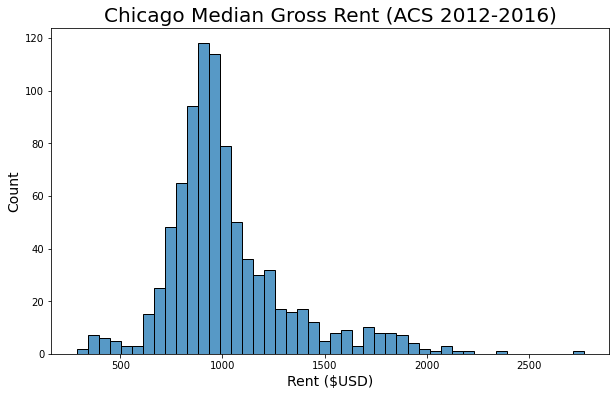

In [6]:
plt.figure(figsize=(10,6))
sns.histplot(loc_aff_index['median_gro'])
plt.ylabel("Count", fontdict={'fontsize':14})
plt.xlabel("Rent ($USD)", fontdict={'fontsize':14})
plt.title("Chicago Median Gross Rent (ACS 2012-2016)", fontdict={'fontsize':20})
plt.savefig(os.path.join(parent,'images/median_gross_rent_hist'),dpi=300)
plt.show()

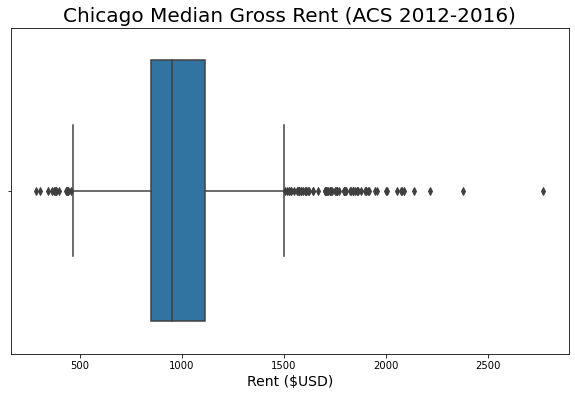

In [7]:
plt.figure(figsize=(10,6))
sns.boxplot(x=loc_aff_index['median_gro'])
plt.xlabel("Rent ($USD)", fontdict={'fontsize':14})
plt.title("Chicago Median Gross Rent (ACS 2012-2016)", fontdict={'fontsize':20})
plt.savefig(os.path.join(parent,'images/median_gross_rent_box'),dpi=300)
plt.show()

In [8]:
round(loc_aff_index['median_gro'].describe())

count     866.0
mean     1021.0
std       304.0
min       286.0
25%       851.0
50%       954.0
75%      1112.0
max      2771.0
Name: median_gro, dtype: float64

Quartiles are as such:
- 1st: <500
- 2nd: 500-1000
- 3rd: 1000-1500
- 4th: >1500

## Preview chicago boundaries against Chicago basemap

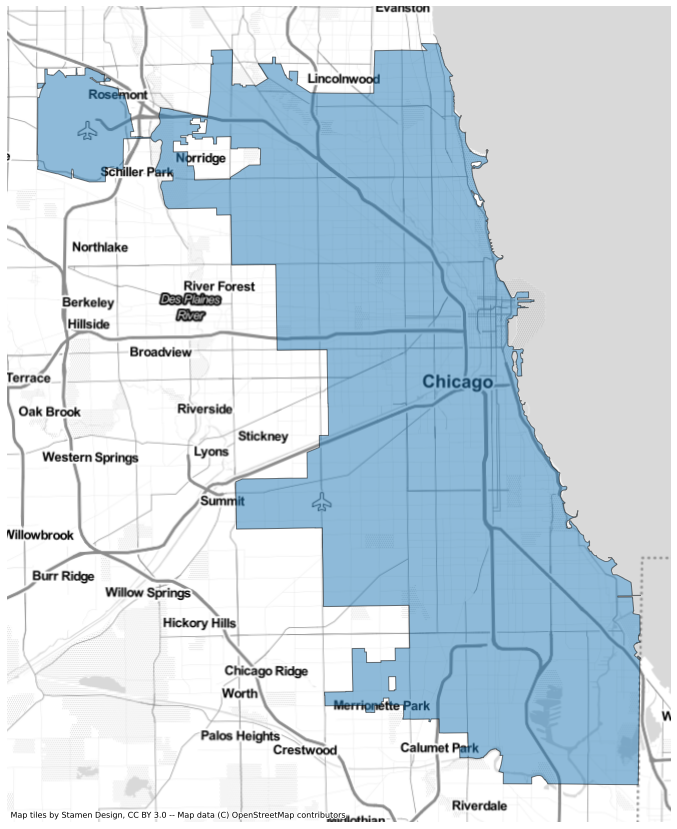

In [9]:
#add basemap with contextily
ax = chicago_boundaries.plot(figsize=(15,15), alpha=0.5, edgecolor='k')
ctx.add_basemap(ax,crs=32616,source=ctx.providers.Stamen.TonerLite)
ax.set_axis_off()

### Chicago basemap w/ Census Tract and Rent data

<Figure size 432x720 with 0 Axes>

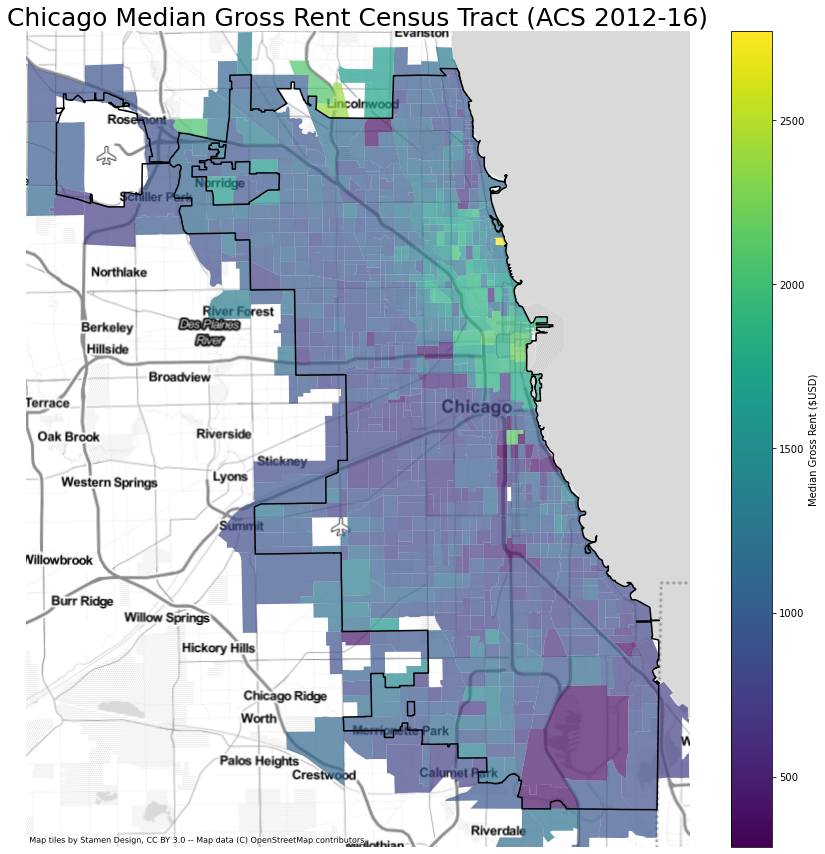

In [38]:
# with color map 
#add basemap with contextily
plt.figure(figsize=(6,10))
ax = chicago_boundaries.boundary.plot(figsize=(15,15), edgecolor='k')

ctx.add_basemap(ax,crs=32616,source=ctx.providers.Stamen.TonerLite)

#plot loc_aff_index
loc_aff_index.plot(column='median_gro',ax=ax, alpha=0.7,
                   legend=True,
                  legend_kwds={'label':"Median Gross Rent ($USD)"})
plt.title("Chicago Median Gross Rent Census Tract (ACS 2012-16)",
         fontdict={'fontsize':25})

ax.set_axis_off()

plt.savefig(os.path.join(parent,'images/chi_med_gross_rent_cmap'), transparent=True)
plt.show()

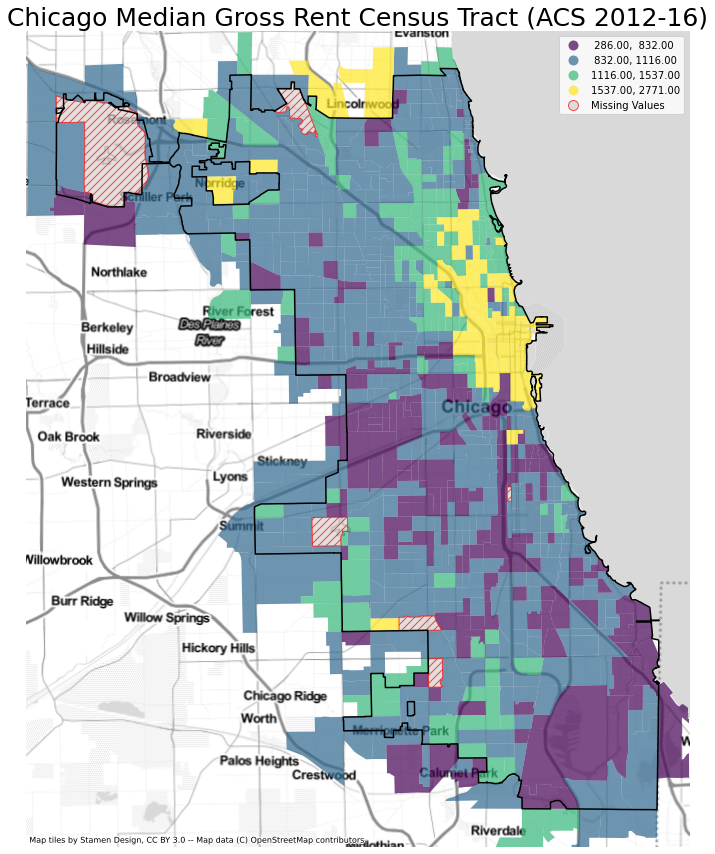

In [39]:
#with natural breaks k = 4
#add basemap with contextily
ax = chicago_boundaries.boundary.plot(figsize=(15,15), edgecolor='k')

ctx.add_basemap(ax,crs=32616,source=ctx.providers.Stamen.TonerLite)

#plot loc_aff_index
loc_aff_index.plot(column='median_gro',ax=ax, alpha=0.7,
                   legend=True,
                  scheme='naturalbreaks',
                   k=4,
                  missing_kwds={
                      "color":"lightgrey",
                      "edgecolor":"red",
                      "hatch":"///",
                      "label":"Missing Values"
                  })
plt.title("Chicago Median Gross Rent Census Tract (ACS 2012-16)",
         fontdict={'fontsize':25})

ax.set_axis_off()

plt.savefig(os.path.join(parent,'images/chi_med_gross_natural_breaks'), transparent=True)
plt.show()

### Segment Cook County data for Chicago

#### Use Clip to segment for schools

In [12]:
school_cook_county.crs

<Derived Projected CRS: EPSG:32616>
Name: WGS 84 / UTM zone 16N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Between 90°W and 84°W, northern hemisphere between equator and 84°N, onshore and offshore. Belize. Canada - Manitoba; Nunavut; Ontario. Costa Rica. Cuba. Ecuador - Galapagos. El Salvador. Guatemala. Honduras. Mexico. Nicaragua. United States (USA).
- bounds: (-90.0, 0.0, -84.0, 84.0)
Coordinate Operation:
- name: UTM zone 16N
- method: Transverse Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [13]:
chicago_boundaries.crs

<Derived Projected CRS: EPSG:32616>
Name: WGS 84 / UTM zone 16N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Between 90°W and 84°W, northern hemisphere between equator and 84°N, onshore and offshore. Belize. Canada - Manitoba; Nunavut; Ontario. Costa Rica. Cuba. Ecuador - Galapagos. El Salvador. Guatemala. Honduras. Mexico. Nicaragua. United States (USA).
- bounds: (-90.0, 0.0, -84.0, 84.0)
Coordinate Operation:
- name: UTM zone 16N
- method: Transverse Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [14]:
school_cook_chicago_clip = gpd.clip(school_cook_county,chicago_boundaries)

In [15]:
school_cook_county.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 2332 entries, 0 to 2331
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   address     2332 non-null   object  
 1   cfname      2332 non-null   object  
 2   cfsubtype   2332 non-null   object  
 3   cftype      2332 non-null   object  
 4   comment     141 non-null    object  
 5   community   2332 non-null   object  
 6   gniscode    2332 non-null   float64 
 7   jurisdicti  2154 non-null   object  
 8   mergeid     2332 non-null   object  
 9   shape_area  2332 non-null   float64 
 10  shape_len   2332 non-null   float64 
 11  source      2332 non-null   object  
 12  geometry    2332 non-null   geometry
dtypes: float64(3), geometry(1), object(9)
memory usage: 237.0+ KB


In [16]:
school_cook_chicago_clip.head()

address  \
2078        3340 E 134th St   
760          901 E 133rd Pl   
2077    13300 S Langley Ave   
2079     13231 S Burley Ave   
2080  13110 S Baltimore Ave   

                                                 cfname          cfsubtype  \
2078                              Saint Columbia School  Non Public School   
760   Chicago International Charter School - Larry H...  Non Public School   
2077        Chicago International Charter School - Bond  Non Public School   
2079                             Clay Elementary School      Public School   
2080                               Saint Florian School  Non Public School   

      cftype comment community   gniscode             jurisdicti mergeid  \
2078  School  Closed   Chicago   417244.0   CATHOLIC BISHOP CHGO   24741   
760   School    None   Chicago  1825968.0  PUB BLDG COMM OF CHGO   17444   
2077  School    None   Chicago        0.0   CATHOLIC BISHOP CHGO   24738   
2079  School    None   Chicago   406189.0   CHICAGO BD EDUCATION   24743   
2080  School    None   Chicago   408471.0   CATHOLIC BISHOP CHGO   24745   

        shape_area    shape_len source  \
2078   72553.52860  1965.674509     CG   
760   278814.29680  2169.737428   ACGI   
2077  355908.07160  2386.327450     GI   
2079  158885.67864  1729.089461   ACGI   
2080  124859.78340  1727.891430   ACGI   

                                               geometry  
2078  MULTIPOLYGON (((454953.914 4611273.661, 454954...  
760   POLYGON ((449825.122 4611310.812, 449825.896 4...  
2077  POLYGON ((449420.909 4611312.110, 449421.401 4...  
2079  POLYGON ((454653.201 4611478.332, 454653.261 4...  
2080  POLYGON ((454350.744 4611684.177, 454350.814 4...

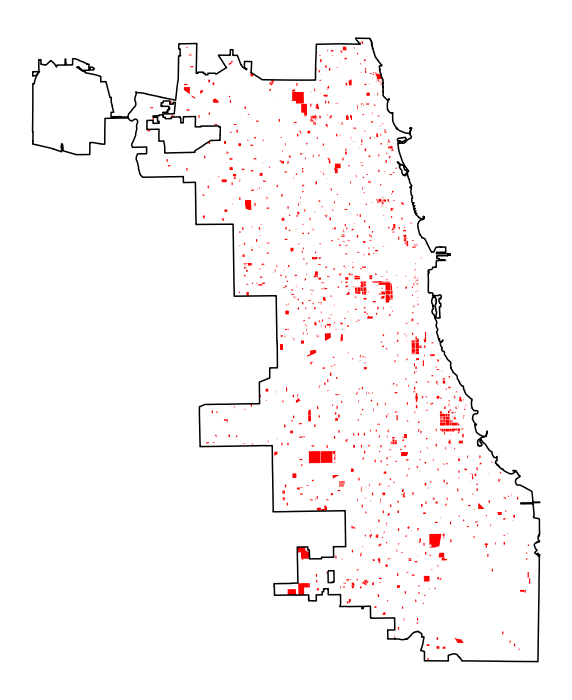

In [17]:
# clipped schools for chicago
basemap = chicago_boundaries.boundary.plot(color='k', figsize=(10,20))
school_cook_chicago_clip.plot(ax=basemap,color='red', legend=True)
basemap.axis('off')
plt.show()

In [18]:
# export to pickle
school_cook_chicago_clip.to_pickle(os.path.join(parent,'data/pickle/school_cook_chicago_clip'))

#### Use Clip to segment Daycare Centers for Chicago

In [19]:
# clip daycare to chicago boundary
daycare_chicago_clip = gpd.clip(daycare,chicago_boundaries)

In [20]:
daycare_chicago_clip.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 135 entries, 935 to 403
Columns: 119 entries, pin10 to geometry
dtypes: float64(27), geometry(1), int64(8), object(83)
memory usage: 126.6+ KB


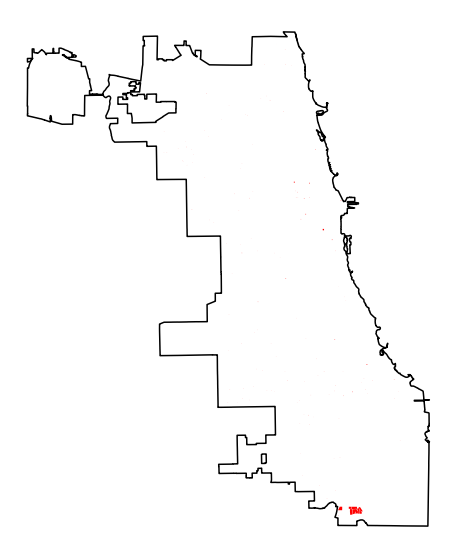

In [21]:
basemap = chicago_boundaries.boundary.plot(color='k',figsize=(20,10))
daycare_chicago_clip.plot(color='red',ax=basemap)
basemap.axis('off')
plt.show()

In [22]:
# export pickle
daycare_chicago_clip.to_pickle(os.path.join(parent,'data/pickle/daycare_chicago_clip'))

In [23]:
daycare_chicago_clip.head()

pin10  longitude   latitude municipali municipa_2  \
935  2607162024 -87.554068  41.710186    Chicago      14000   
837  2131216002 -87.556121  41.748045    Chicago      14000   
933  2534101012 -87.616793  41.651987    Chicago      14000   
934  2535100020 -87.599539  41.656232    Chicago      14000   
932  2534100009 -87.614706  41.657532    Chicago      14000   

            politicalt  commission  congressio  staterepre  statesenat  ...  \
935  Town of Hyde Park         4.0         2.0        25.0        13.0  ...   
837  Town of Hyde Park         4.0         2.0        26.0        13.0  ...   
933  Town of Hyde Park         5.0         2.0        29.0        15.0  ...   
934  Town of Hyde Park         5.0         2.0        29.0        15.0  ...   
932  Town of Hyde Park         5.0         2.0        29.0        15.0  ...   

    USER_Lan_1 USER_Lan_2 USER_Lan_3 USER_DayCa  USER_Nig_1  \
935    ENGLISH    SPANISH       None          7           0   
837    ENGLISH    ENGLISH       None          8           8   
933    ENGLISH    ENGLISH       None         12          12   
934    ENGLISH    ENGLISH       None          3           3   
932    ENGLISH    ENGLISH       None          3           3   

              USER_Statu                            UIDField_1   Shape_Leng  \
935  License issued (IL)  ee9997e1-acbd-4b70-9172-6dadc37c4db6   101.397994   
837  License issued (IL)  0948dd0b-53f8-48f7-b8ad-0849cecf1b75    91.050969   
933  License issued (IL)  ed614a0d-6ebb-41e4-879e-df68d3a04976   140.303055   
934  License issued (IL)  a1358cee-b928-4246-9dd3-3f4a12eb8e54  8739.740987   
932  License issued (IL)  f87610fd-a67c-4e03-a835-2f5ffb87aae3  1185.527716   

        Shape_Area                                           geometry  
935     358.229809  POLYGON ((453885.048 4617742.625, 453885.015 4...  
837     288.899284  POLYGON ((453743.626 4621947.094, 453743.567 4...  
933     874.022246  POLYGON ((448668.676 4611312.690, 448614.723 4...  
934  529996.217562  MULTIPOLYGON (((450603.617 4611685.220, 450618...  
932   84281.770351  POLYGON ((448958.700 4611797.150, 448614.615 4...  

[5 rows x 119 columns]

In [24]:
%who GeoDataFrame

bike_routes	 chicago_boundaries	 daycare	 daycare_chicago_clip	 forestry	 loc_aff_index	 open_spaces	 parks	 school_cook_chicago_clip	 
school_cook_county	 


### Loop through each gdf to get basic map

In [25]:
# reset name attribute
bike_routes.name = 'bike_routes'
daycare_chicago_clip.name = 'daycare'
forestry.name = 'forestry'
parks.name = 'parks'
school_cook_chicago_clip.name = 'schools'
open_spaces.name = 'open_spaces'
loc_aff_index.name = 'loc_aff_index'

In [26]:
# make a list of all chicago gdf
chicago_gdf = [bike_routes, daycare_chicago_clip,forestry,parks,school_cook_chicago_clip, open_spaces, loc_aff_index]

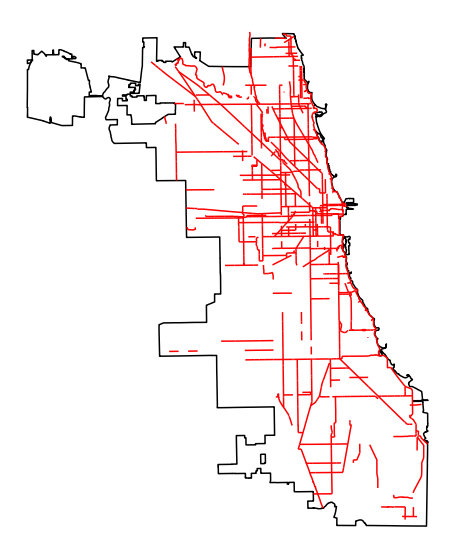

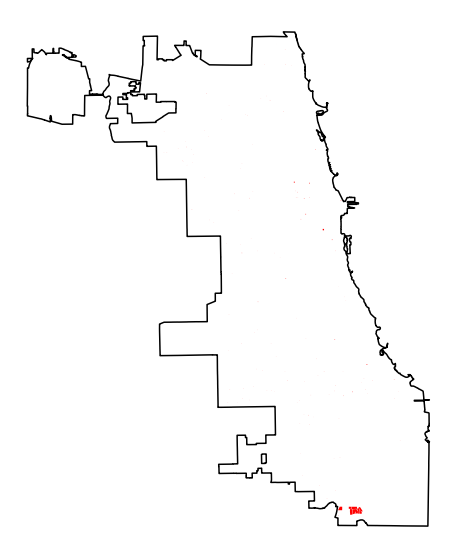

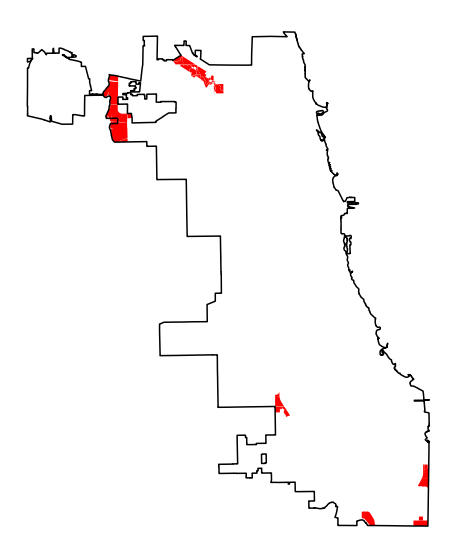

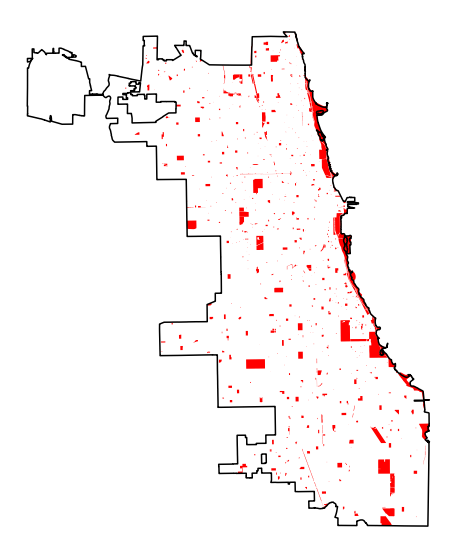

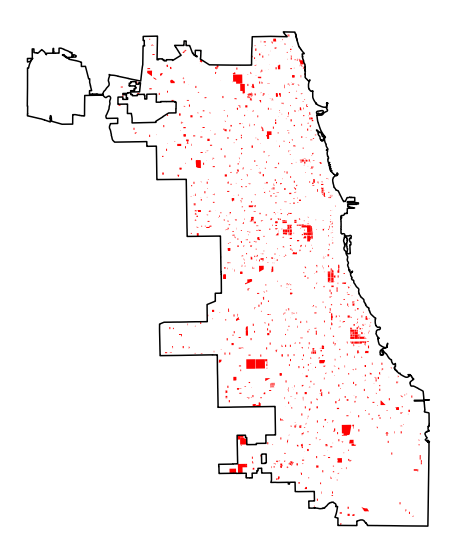

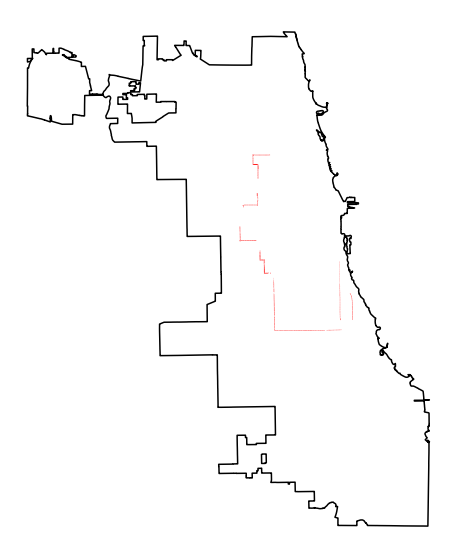

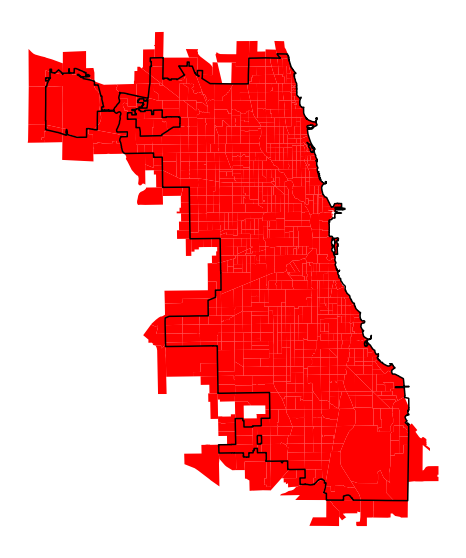

In [27]:
for gdf in chicago_gdf:
    basemap = chicago_boundaries.boundary.plot(color='k',figsize=(20,10))
    gdf.plot(color='red',ax=basemap)
    basemap.axis('off')
    plt.show()

### Combine all on one map

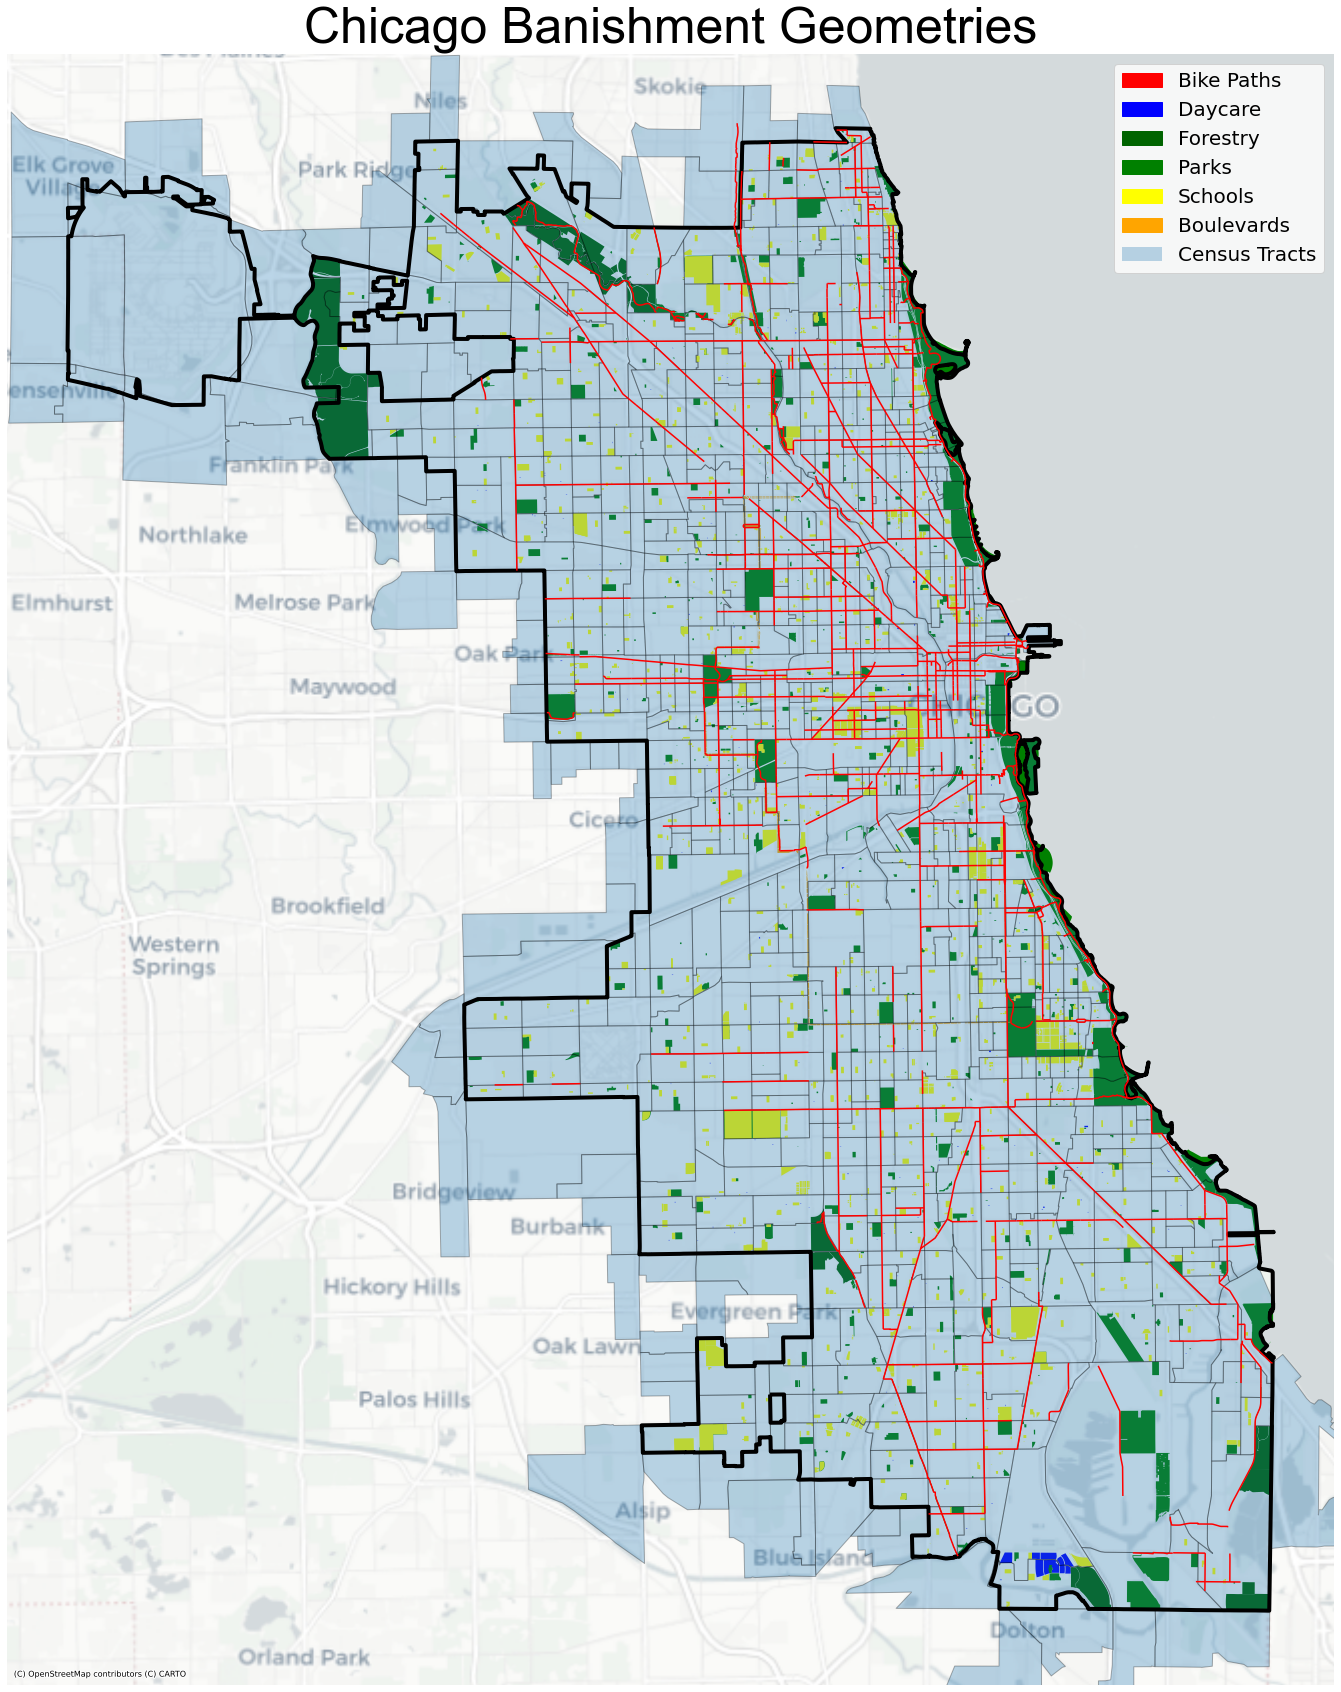

In [28]:
# set basemap with Chicago Boundaries
basemap = chicago_boundaries.boundary.plot(color='k',
                                           figsize=(30,30),
                                          linewidth=4,
                                          label='Chicago Boundary')

# add contextily basemap
ctx.add_basemap(basemap,crs=32616,source=ctx.providers.CartoDB.Positron)

# plot each geometry
bike_routes.plot(color='red',ax=basemap, label='Bike Paths')
bike_leg = mpatches.Patch(color='red', label='Bike Paths')

daycare_chicago_clip.plot(color='blue', ax=basemap)
daycare_leg = mpatches.Patch(color='blue', label='Daycare')

forestry.plot(color='darkgreen',ax=basemap)
forestry_leg = mpatches.Patch(color='darkgreen', label='Forestry')

parks.plot(color='green',ax=basemap)
parks_leg = mpatches.Patch(color='green',label='Parks')

school_cook_chicago_clip.plot(color='yellow',ax=basemap)
schools_leg = mpatches.Patch(color='yellow', label='Schools')

open_spaces.plot(color='orange', ax=basemap)
open_spaces_leg = mpatches.Patch(color='orange', label='Boulevards')

loc_aff_index.plot(edgecolor='k',ax=basemap, alpha=0.3)
loc_aff_index_leg = mpatches.Patch(label='Census Tracts', alpha=0.3)

# turn off axies
basemap.axis('off')

# legend
basemap.legend(prop={'size':20}, handles=[bike_leg,
                                          daycare_leg, 
                                          forestry_leg, 
                                          parks_leg, 
                                          schools_leg,
                                          open_spaces_leg,
                                         loc_aff_index_leg])


# set title
basemap.set_title('Chicago Banishment Geometries', fontdict={'size':50,
                                                            'weight':'normal',
                                                            'family':'arial'})
plt.show()


## Buffer geometry
- Buffer each geometry that is needed for housing banishment map
- 500 ft = 152.4 meters
- 250 ft = 76.2 meters

In [29]:
# create housing banishment gdf list
housing_banishmnet_gdf = [school_cook_chicago_clip, daycare_chicago_clip, parks]

### Buffer

In [30]:
# buffer each gdf 500 ft (152.4 metres), 250 ft (76.2 meters) and pickle buffer for next notebook
for gdf in housing_banishmnet_gdf:
    name = str(gdf.name)
    gdf['buffer_500']=gdf['geometry'].buffer(152.4)
    gdf['buffer_250']=gdf['geometry'].buffer(76.2)
    gdf.to_pickle(os.path.join(parent,'data/pickle', name + '_buffer'))

In [31]:
# check out new geometry columns
school_cook_chicago_clip.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 1179 entries, 2078 to 756
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   address     1179 non-null   object  
 1   cfname      1179 non-null   object  
 2   cfsubtype   1179 non-null   object  
 3   cftype      1179 non-null   object  
 4   comment     110 non-null    object  
 5   community   1179 non-null   object  
 6   gniscode    1179 non-null   float64 
 7   jurisdicti  1096 non-null   object  
 8   mergeid     1179 non-null   object  
 9   shape_area  1179 non-null   float64 
 10  shape_len   1179 non-null   float64 
 11  source      1179 non-null   object  
 12  geometry    1179 non-null   geometry
 13  buffer_500  1179 non-null   geometry
 14  buffer_250  1179 non-null   geometry
dtypes: float64(3), geometry(3), object(9)
memory usage: 147.4+ KB


In [32]:
# set geometry to 500 ft
for gdf in housing_banishmnet_gdf:
    gdf.set_geometry('buffer_500',inplace=True)

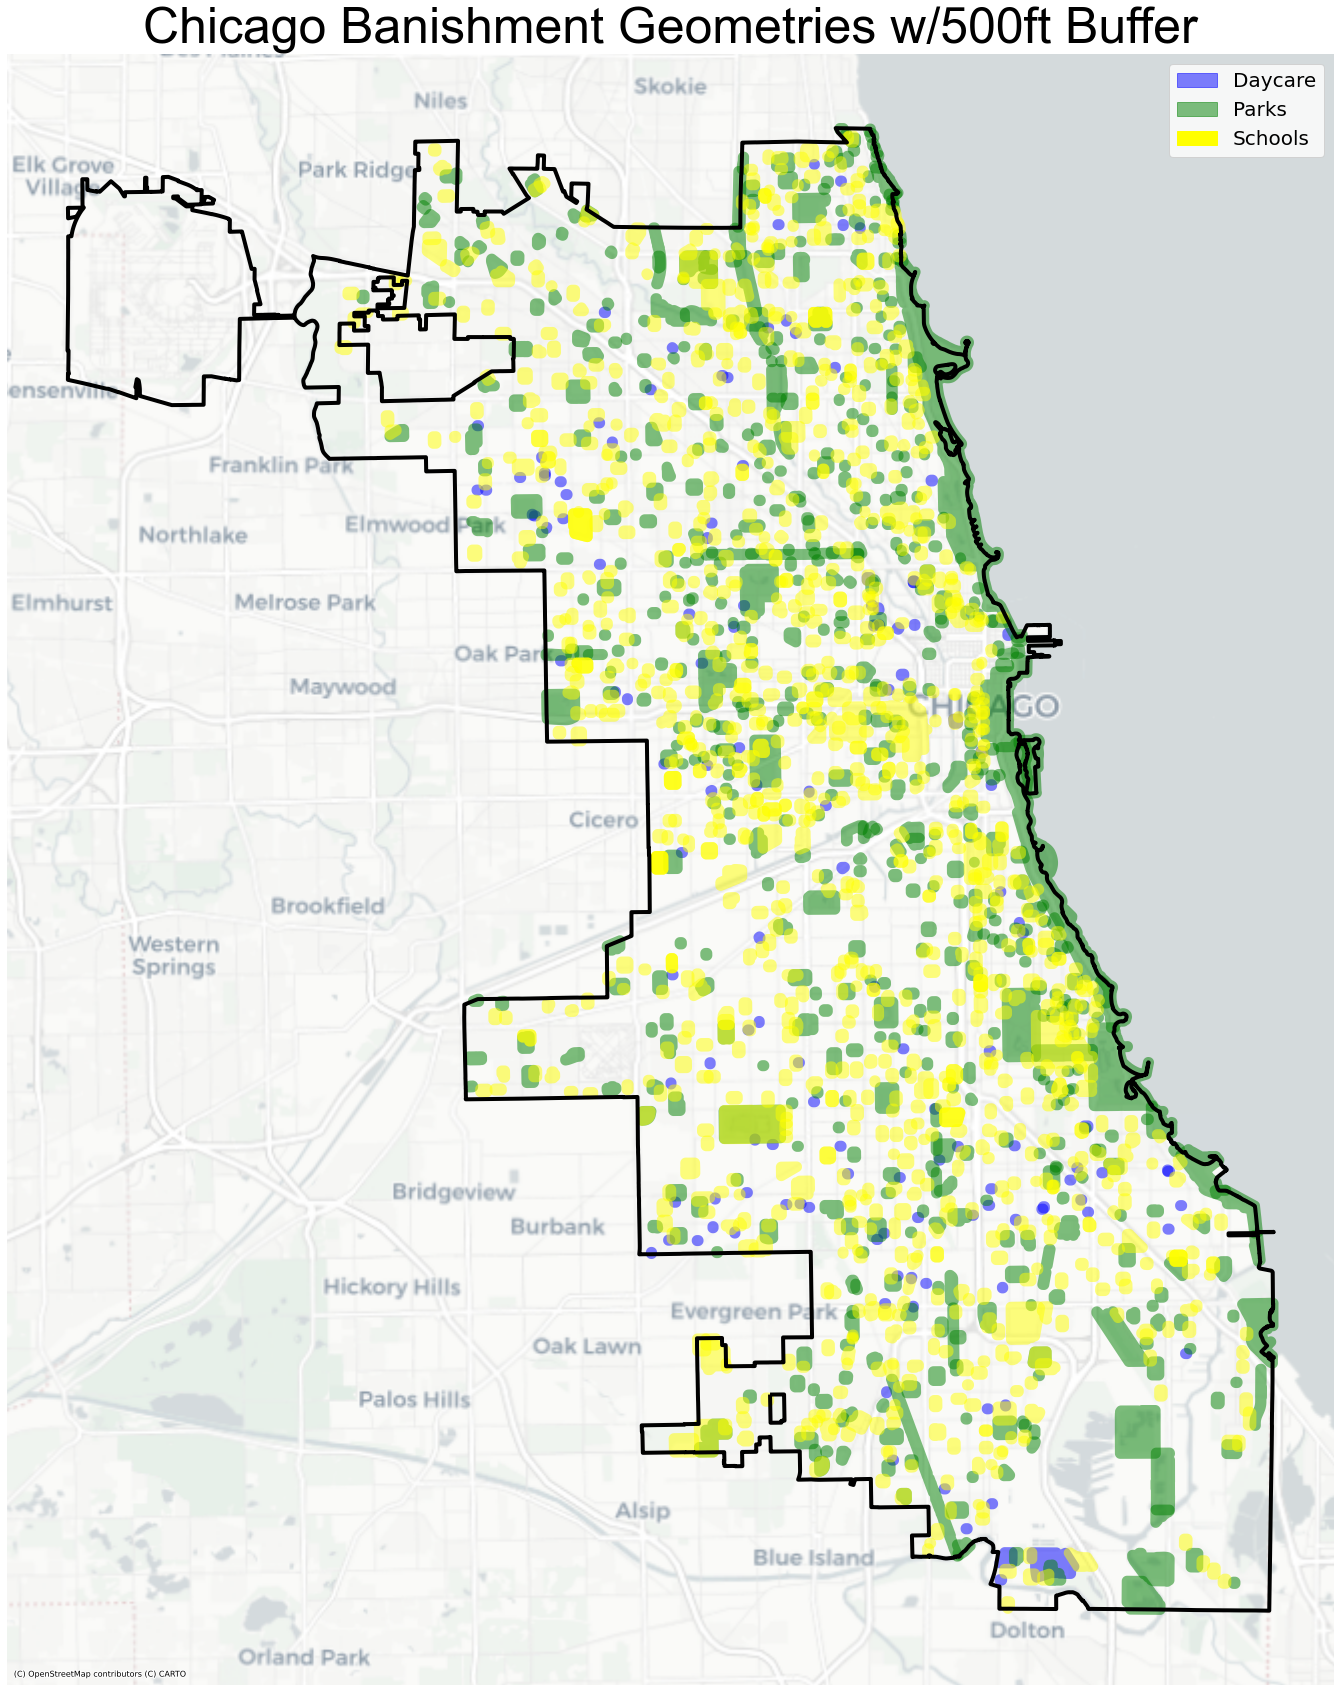

In [33]:
# 500 ft buffer map
# set basemap with Chicago Boundaries
basemap = chicago_boundaries.boundary.plot(color='k',
                                           figsize=(30,30),
                                          linewidth=4,
                                           label='Chicago Boundaries')

# add contextily basemap
ctx.add_basemap(basemap,crs=32616,source=ctx.providers.CartoDB.Positron)

# plot each geometry
daycare_chicago_clip.plot(color='blue', ax=basemap, alpha=0.5)
daycare_leg = mpatches.Patch(color='blue', label='Daycare', alpha=0.5)

parks.plot(color='green',ax=basemap, alpha=0.5)
parks_leg = mpatches.Patch(color='green',label='Parks', alpha=0.5)

school_cook_chicago_clip.plot(color='yellow',ax=basemap, alpha=0.5)
schools_leg = mpatches.Patch(color='yellow', label='Schools')

# turn off axies
basemap.axis('off')

# legend
basemap.legend(prop={'size':20}, handles=[daycare_leg,  
                                          parks_leg, 
                                          schools_leg])

# turn off axies
basemap.axis('off')

# set title
basemap.set_title('Chicago Banishment Geometries w/500ft Buffer', fontdict={'size':50,
                                                            'weight':'normal',
                                                            'family':'arial'})
plt.show()

### Buffer - 250ft

In [34]:
# set 250 ft buffer as geometry
for gdf in housing_banishmnet_gdf:
    gdf.set_geometry('buffer_250',inplace=True)

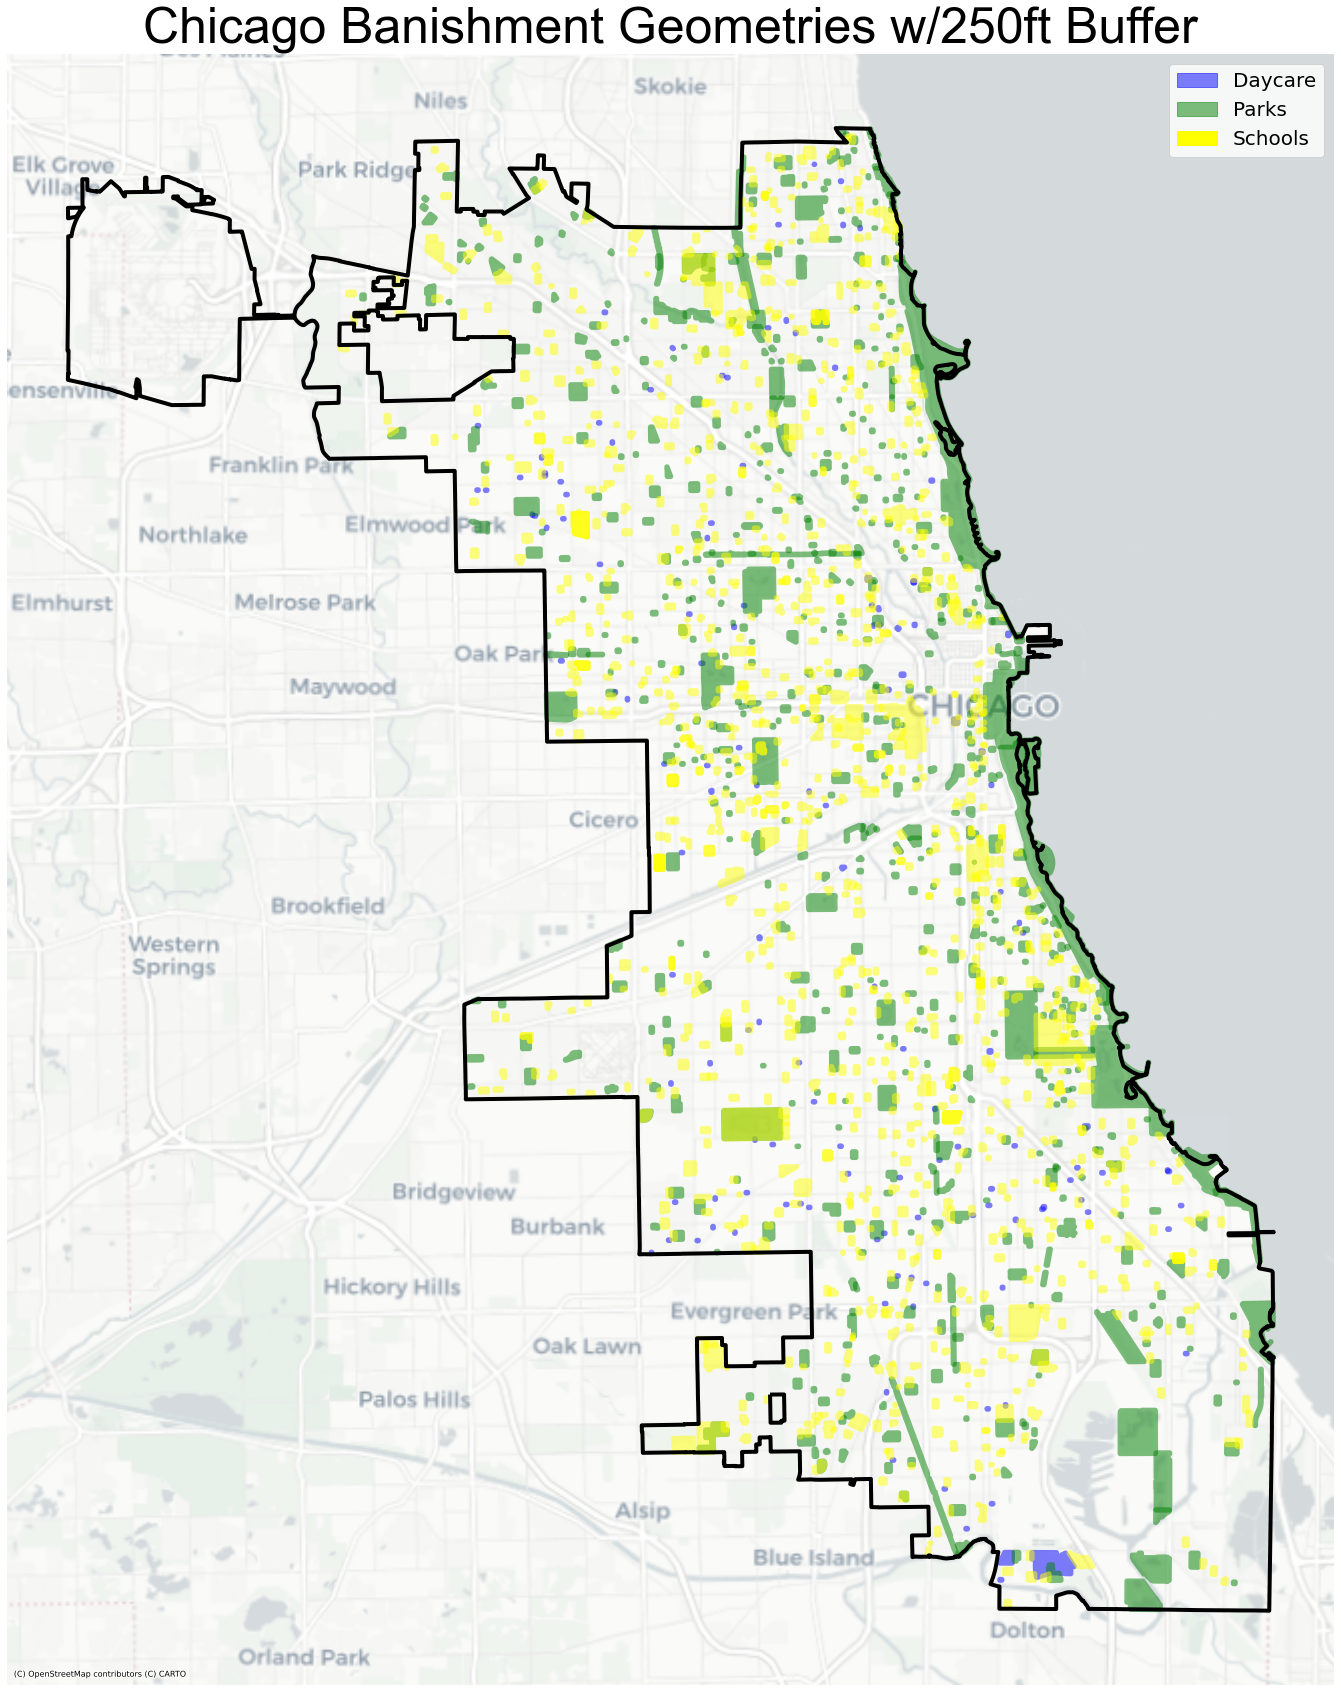

In [35]:
# set basemap with Chicago Boundaries
basemap = chicago_boundaries.boundary.plot(color='k',
                                           figsize=(30,30),
                                          linewidth=4,
                                           label='Chicago Boundaries')

# add contextily basemap
ctx.add_basemap(basemap,crs=32616,source=ctx.providers.CartoDB.Positron)

# plot each geometry

daycare_chicago_clip.plot(color='blue', ax=basemap, alpha=0.5)
daycare_leg = mpatches.Patch(color='blue', label='Daycare', alpha=0.5)

parks.plot(color='green',ax=basemap, alpha=0.5)
parks_leg = mpatches.Patch(color='green',label='Parks', alpha=0.5)

school_cook_chicago_clip.plot(color='yellow',ax=basemap, alpha=0.5)
schools_leg = mpatches.Patch(color='yellow', label='Schools')

# turn off axies
basemap.axis('off')

# legend
basemap.legend(prop={'size':20}, handles=[daycare_leg,  
                                          parks_leg, 
                                          schools_leg])

# turn off axies
basemap.axis('off')

# set title
basemap.set_title('Chicago Banishment Geometries w/250ft Buffer', fontdict={'size':50,
                                                            'weight':'normal',
                                                            'family':'arial'})
plt.show()